<a href="https://colab.research.google.com/github/adeliapebriani/Classification-and-Regression-Tree/blob/main/CART-THYROID-CCP-CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.utils import shuffle

### **1. DATASET**

In [519]:
filename = 'https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Dataset/sick.data' #load data
data = pd.read_csv(filename, names=["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured","TT4","T4U measured","T4U","FTI measured","FTI","TBG measured","TBG","referral source","label"])
data.head(10) #menampilkan 10 data pertama

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,?,SVI,sick.|1367
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


### **2. PREPROCESSING**

In [520]:
for i in range(0, len(data['label'])):
  if 'negative' in data['label'][i]:
    data['label'][i]= '0'
  elif 'sick' in data['label'][i]:
     data['label'][i]= '1'
data.head(10)
data['label'] = data['label'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on thyroxine               2800 non-null   object
 3   query on thyroxine         2800 non-null   object
 4   on antithyroid medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid surgery            2800 non-null   object
 8   I131 treatment             2800 non-null   object
 9   query hypothyroid          2800 non-null   object
 10  query hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

In [521]:
print("Jumlah kemunculan nilai pada atribut sex: \n", data['sex'].value_counts())
data['sex'] = data['sex'].replace('F', 0)
data['sex'] = data['sex'].replace('M', 1)
data['sex'] = data['sex'].replace('?', 0)
print("Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: \n", data['sex'].value_counts())

Jumlah kemunculan nilai pada atribut sex: 
 F    1830
M     860
?     110
Name: sex, dtype: int64
Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: 
 0    1940
1     860
Name: sex, dtype: int64


In [522]:
data = data.replace('?', np.nan)

In [523]:
data.isnull().sum() #menampilkan jumlah nilai null dari tiap atribut

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           284
T3 measured                     0
T3                            585
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           297
FTI measured                    0
FTI                           295
TBG measured                    0
TBG                          2800
referral source                 0
label         

In [524]:
print("Jumlah kemunculan nilai pada atribut on thyroxine: \n", data['on thyroxine'].value_counts())
data['on thyroxine'] = data['on thyroxine'].replace('f', 0)
data['on thyroxine'] = data['on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query on thyroxine: \n", data['query on thyroxine'].value_counts())
data['query on thyroxine'] = data['query on thyroxine'].replace('f', 0)
data['query on thyroxine'] = data['query on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut on antithyroid medication: \n", data['on antithyroid medication'].value_counts())
data['on antithyroid medication'] = data['on antithyroid medication'].replace('f', 0)
data['on antithyroid medication'] = data['on antithyroid medication'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut sick: \n", data['sick'].value_counts())
data['sick'] = data['sick'].replace('f', 0)
data['sick'] = data['sick'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut pregnant: \n", data['pregnant'].value_counts())
data['pregnant'] = data['pregnant'].replace('f', 0)
data['pregnant'] = data['pregnant'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut thyroid surgery: \n", data['thyroid surgery'].value_counts())
data['thyroid surgery'] = data['thyroid surgery'].replace('f', 0)
data['thyroid surgery'] = data['thyroid surgery'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut I131 treatment: \n", data['I131 treatment'].value_counts())
data['I131 treatment'] = data['I131 treatment'].replace('f', 0)
data['I131 treatment'] = data['I131 treatment'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hypothyroid: \n", data['query hypothyroid'].value_counts())
data['query hypothyroid'] = data['query hypothyroid'].replace('f', 0)
data['query hypothyroid'] = data['query hypothyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hyperthyroid: \n", data['query hyperthyroid'].value_counts())
data['query hyperthyroid'] = data['query hyperthyroid'].replace('f', 0)
data['query hyperthyroid'] = data['query hyperthyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut lithium: \n", data['lithium'].value_counts())
data['lithium'] = data['lithium'].replace('f', 0)
data['lithium'] = data['lithium'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut goitre: \n", data['goitre'].value_counts())
data['goitre'] = data['goitre'].replace('f', 0)
data['goitre'] = data['goitre'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut tumor: \n", data['tumor'].value_counts())
data['tumor'] = data['tumor'].replace('f', 0)
data['tumor'] = data['tumor'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut hypopituitary: \n", data['hypopituitary'].value_counts())
data['hypopituitary'] = data['hypopituitary'].replace('f', 0)
data['hypopituitary'] = data['hypopituitary'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut psych: \n", data['psych'].value_counts())
data['psych'] = data['psych'].replace('f', 0)
data['psych'] = data['psych'].replace('t', 1)

Jumlah kemunculan nilai pada atribut on thyroxine: 
 f    2470
t     330
Name: on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut query on thyroxine: 
 f    2760
t      40
Name: query on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut on antithyroid medication: 
 f    2766
t      34
Name: on antithyroid medication, dtype: int64


Jumlah kemunculan nilai pada atribut sick: 
 f    2690
t     110
Name: sick, dtype: int64


Jumlah kemunculan nilai pada atribut pregnant: 
 f    2759
t      41
Name: pregnant, dtype: int64


Jumlah kemunculan nilai pada atribut thyroid surgery: 
 f    2761
t      39
Name: thyroid surgery, dtype: int64


Jumlah kemunculan nilai pada atribut I131 treatment: 
 f    2752
t      48
Name: I131 treatment, dtype: int64


Jumlah kemunculan nilai pada atribut query hypothyroid: 
 f    2637
t     163
Name: query hypothyroid, dtype: int64


Jumlah kemunculan nilai pada atribut query hyperthyroid: 
 f    2627
t     173
Name: query hyperthyroi

In [525]:
data.isnull().sum()

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           284
T3 measured                     0
T3                            585
TT4 measured                    0
TT4                           184
T4U measured                    0
T4U                           297
FTI measured                    0
FTI                           295
TBG measured                    0
TBG                          2800
referral source                 0
label         

In [526]:
data.drop('TBG', inplace=True, axis=1)
data.drop('TBG measured', inplace=True, axis=1)
data.drop('T4U measured', inplace=True, axis=1)
data.drop('TSH measured', inplace=True, axis=1)
data.drop('FTI measured', inplace=True, axis=1)
data.drop('T3 measured', inplace=True, axis=1)
data.drop('TT4 measured', inplace=True, axis=1)
data.drop('referral source', inplace=True, axis=1)
data.drop('hypopituitary', inplace=True, axis=1)

In [527]:
data.head(10)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,0
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,0
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,0
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,0
5,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.03,NaN,183,1.3,141,0
6,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,72,0.92,78,0
7,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.2,0.6,80,0.7,115,1
8,66,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.6,2.2,123,0.93,132,0
9,68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.4,1.6,83,0.89,93,0


In [528]:
column = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in range(0, len(column)):
  data[column[i]] = data[column[i]].astype(float)

In [529]:

mean = data["age"].mean()
data["age"] = data["age"].replace(np.nan, mean)

mean = data["TSH"].mean()
data["TSH"] = data["TSH"].replace(np.nan, mean)


mean = data["T3"].mean()
data["T3"] = data["T3"].replace(np.nan, mean)
data

mean = data["TT4"].mean()
data["TT4"] = data["TT4"].replace(np.nan, mean)

mean = data["T4U"].mean()
data["T4U"] = data["T4U"].replace(np.nan, mean)

mean = data["FTI"].mean()
data["FTI"] = data["FTI"].replace(np.nan, mean)

data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30000,2.500000,125.0,1.140000,109.000000,0
1,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10000,2.000000,102.0,0.997912,110.787984,0
2,46.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98000,2.024966,109.0,0.910000,120.000000,0
3,70.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.16000,1.900000,175.0,0.997912,110.787984,0
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72000,1.200000,61.0,0.870000,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.70000,2.024966,155.0,1.050000,148.000000,0
2796,73.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4.67215,0.700000,63.0,0.880000,72.000000,1
2797,75.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4.67215,2.024966,147.0,0.800000,183.000000,0
2798,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40000,2.024966,100.0,0.830000,121.000000,0


In [530]:
data = data.drop_duplicates()

data = data[data.age != 455.0]


In [531]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
label                        0
dtype: int64

In [532]:
data = data.drop_duplicates()

data = data[data.age != 455.0]

### **3. ANALISIS DATA**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


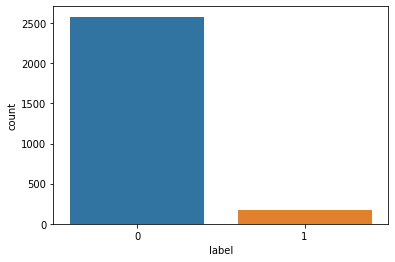

In [533]:
sns.countplot(data['label'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


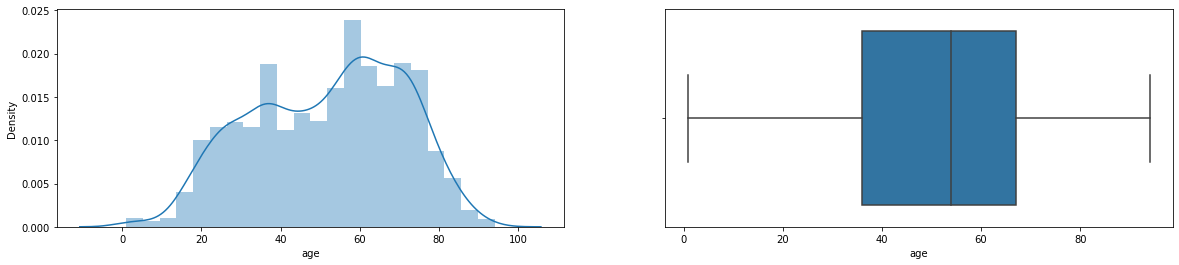

In [534]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(data['age'])

f.add_subplot(1,2,2)
sns.boxplot(data['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


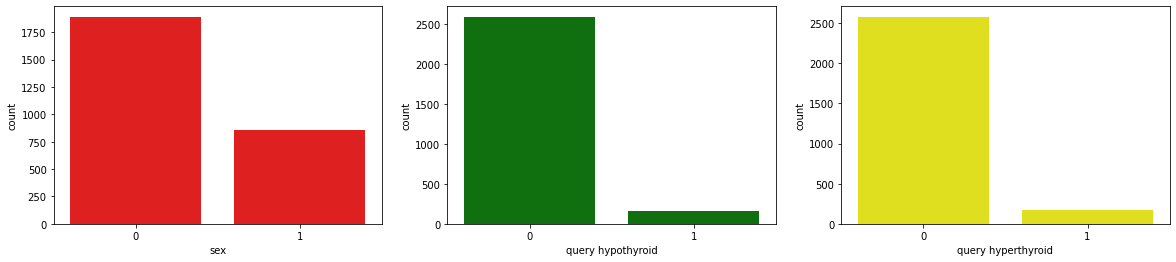

In [535]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(data['sex'], color='red')

f.add_subplot(1,3,2)
sns.countplot(data['query hypothyroid'], color='green')

f.add_subplot(1,3,3)
sns.countplot(data['query hyperthyroid'], color='yellow')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


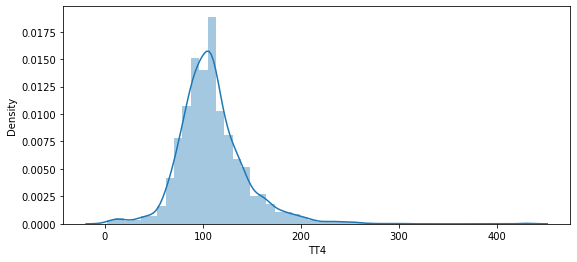

In [536]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(data['TT4'])


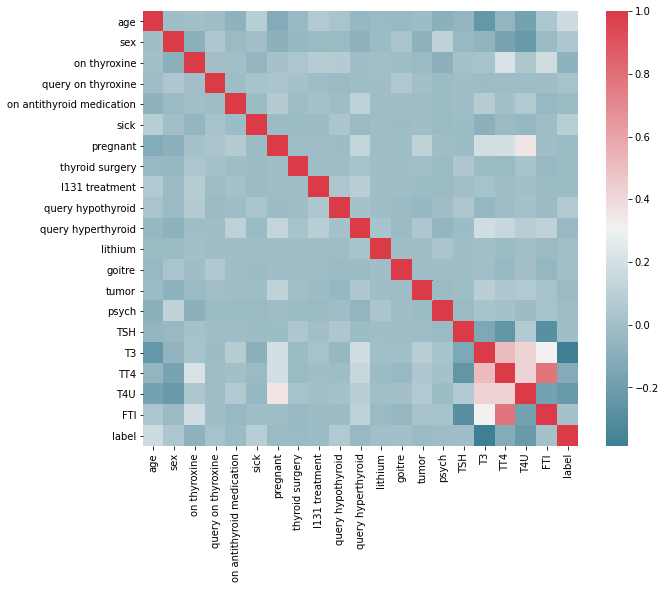

In [537]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


### **4. CART DENGAN GINI INDEX**

DecisionTree Feature ranking:
1. feature T3 (0.565951)
2. feature FTI (0.128637)
3. feature TT4 (0.121688)
4. feature TSH (0.054069)
5. feature age (0.038820)
6. feature on thyroxine (0.034967)
7. feature T4U (0.022651)
8. feature query on thyroxine (0.014133)
9. feature query hyperthyroid (0.007936)
10. feature sick (0.006689)
11. feature sex (0.004459)
12. feature psych (0.000000)
13. feature tumor (0.000000)
14. feature goitre (0.000000)
15. feature lithium (0.000000)
16. feature I131 treatment (0.000000)
17. feature thyroid surgery (0.000000)
18. feature pregnant (0.000000)
19. feature on antithyroid medication (0.000000)
20. feature query hypothyroid (0.000000)


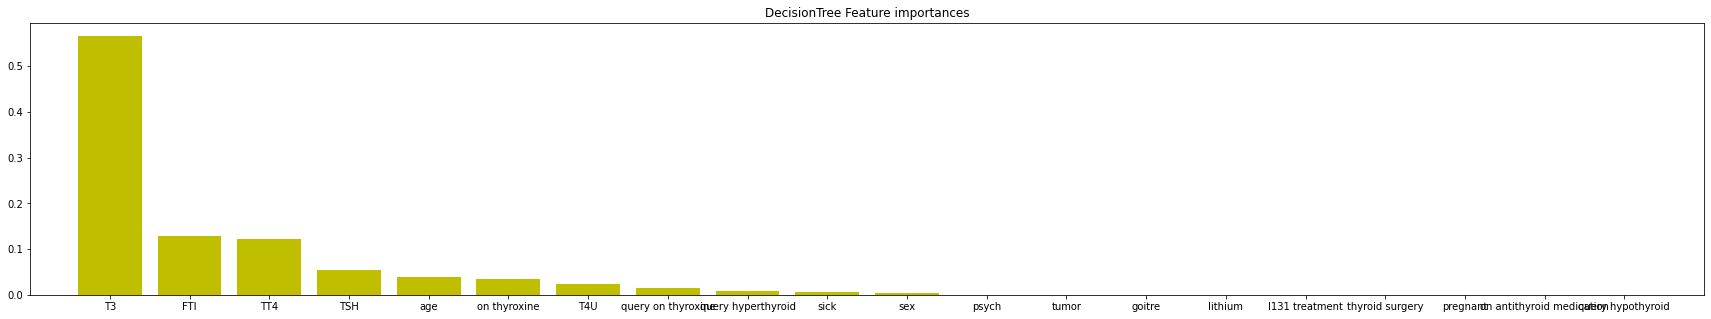

In [538]:
print("DecisionTree Feature ranking:")

X=data.iloc[:,0:20].values

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, data.columns[indices[f]], importance[indices[f]]))

plt.figure(figsize=(30,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importance[indices], color="y", align="center")
plt.xticks(range(X.shape[1]), data.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


In [539]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


X=data.iloc[:,0:20].values
#Label Set
y=data.iloc[:,20].values


X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)


model=DecisionTreeClassifier(criterion='gini', splitter='best')

'''model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)
accuracy_score_train = accuracy_score(y_trained, y_train)
print("Akurasi Score Data Train: ", accuracy_score_train)

Akurasi Score Data Train:  1.0


In [502]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(4,8)}
model = GridSearchCV(DecisionTreeClassifier(criterion='gini', splitter='best'), parameters, cv=10)
model.fit(X=X_train, y=y_train)
tree_model = model.best_estimator_
print (model.best_score_, model.best_params_) 

0.981098447539984 {'max_depth': 7}


In [503]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


X=data.iloc[:,0:20].values
#Label Set
y=data.iloc[:,20].values


X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)


model=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7)

'''model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)
accuracy_score_train = accuracy_score(y_trained, y_train)
print("Akurasi Score Data Train: ", accuracy_score_train)

Akurasi Score Data Train:  0.9975751697381183


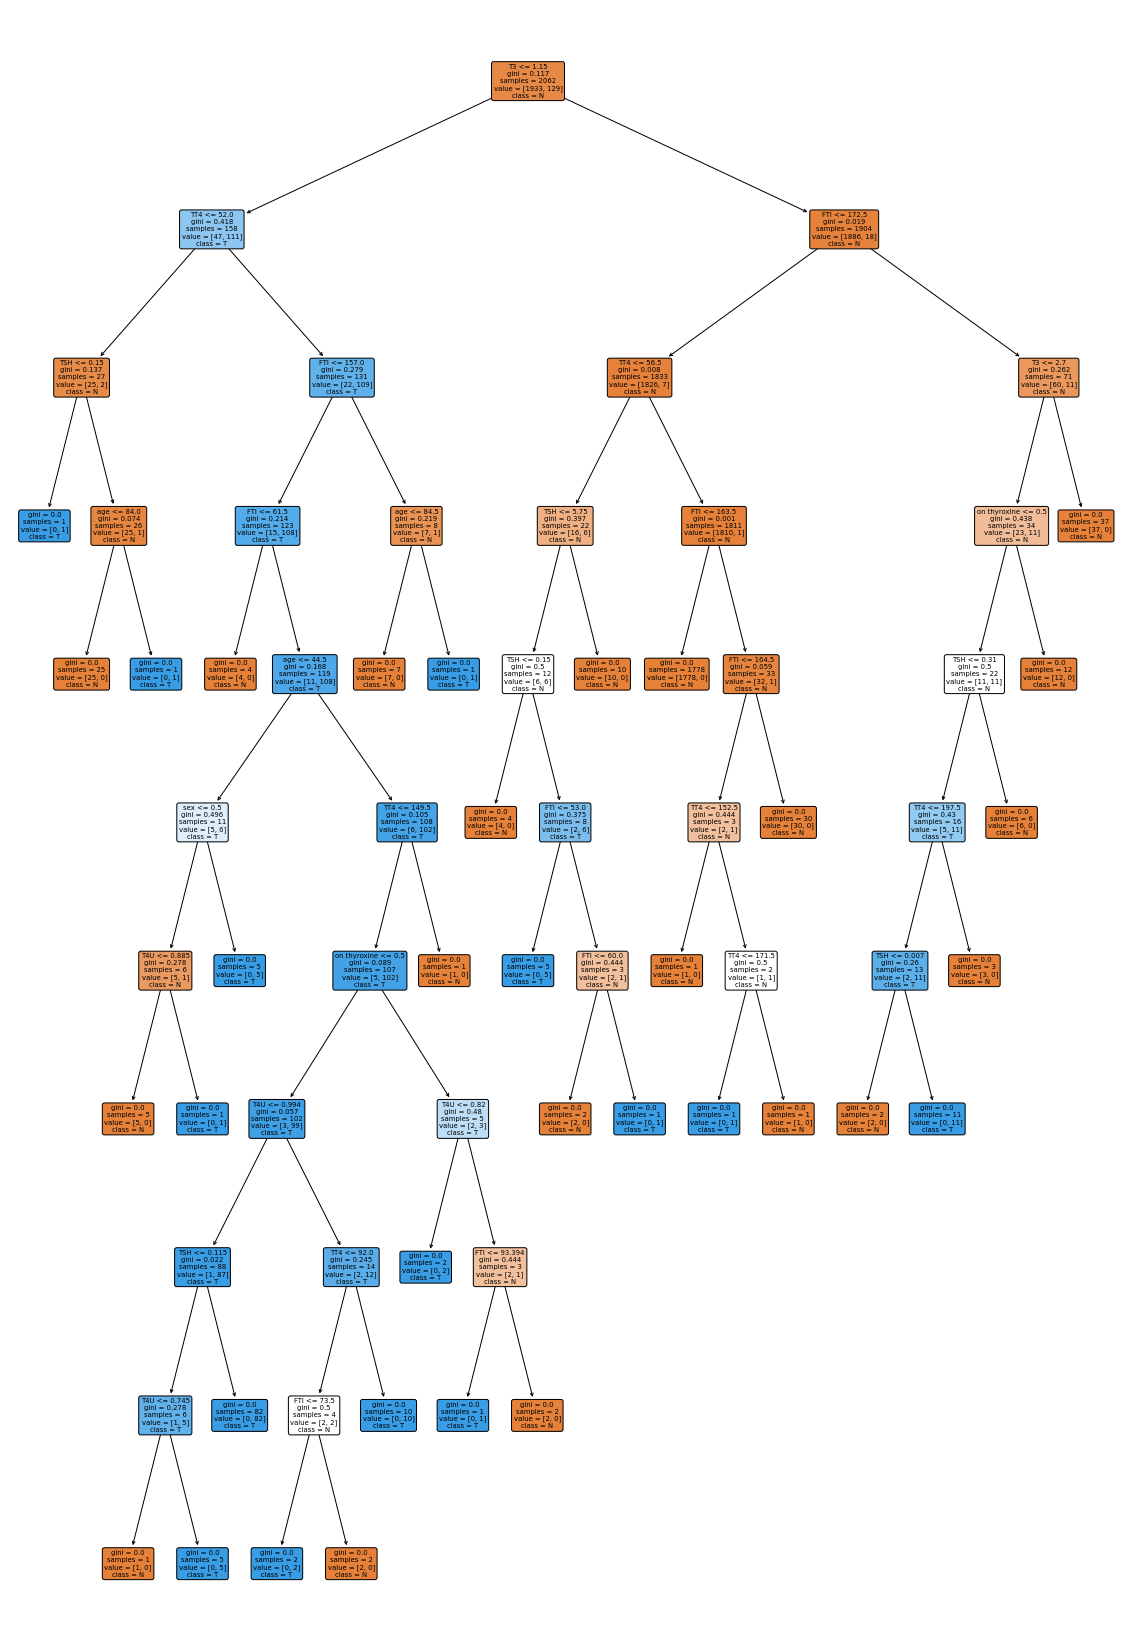

In [540]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(20,30))
_ = plot_tree(model,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)

In [541]:
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)


X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))

Akurasi Score Data Test:  0.9742798353909465
Confusion Matrix: 
 [[899  13]
 [ 12  48]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       912
           1       0.79      0.80      0.79        60

    accuracy                           0.97       972
   macro avg       0.89      0.89      0.89       972
weighted avg       0.97      0.97      0.97       972

Accuracy Score : 0.9742798353909465
Precision Score : 0.7868852459016393
Recall Score : 0.8
F1 Score : 0.7933884297520661


## **5. TREE PRUNING**

In [542]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.         0.00024235 0.00047946 0.00058196 0.00062177 0.00063491
 0.00064662 0.00080828 0.00080828 0.00084869 0.00087324 0.00089809
 0.00138877 0.00156177 0.00164142 0.00168923 0.00169272 0.001799
 0.0030917  0.00413153 0.01247506 0.06797368]


In [543]:
tree_list = []

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(criterion='gini',random_state=100,ccp_alpha=alpha)
    tree.fit(X_train,y_train)
    tree_list.append(tree)

    
'''clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))'''

'clfs = []\nfor ccp_alpha in ccp_alphas:\n    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)\n    clf.fit(X_train, y_train)\n    clfs.append(clf)\nprint("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(\n      clfs[-1].tree_.node_count, ccp_alphas[-1]))'

In [544]:
training_score = [tree.score(X_train,y_train) for tree in tree_list]
testing_score = [tree.score(X_test1,y_test1) for tree in tree_list]

print(training_score)
print(testing_score)

[1.0, 0.9995150339476236, 0.9990300678952473, 0.9980601357904947, 0.997090203685742, 0.997090203685742, 0.9966052376333656, 0.9961202715809894, 0.995635305528613, 0.9951503394762367, 0.9946653734238603, 0.9936954413191077, 0.9917555771096024, 0.9917555771096024, 0.9907856450048497, 0.9888457807953444, 0.9873908826382153, 0.9844810863239574, 0.9825412221144519, 0.979631425800194, 0.9684772065955383, 0.937439379243453]
[0.9783950617283951, 0.9794238683127572, 0.9794238683127572, 0.9825102880658436, 0.9825102880658436, 0.9825102880658436, 0.9876543209876543, 0.9876543209876543, 0.9794238683127572, 0.977366255144033, 0.9753086419753086, 0.9763374485596708, 0.9835390946502057, 0.9835390946502057, 0.9835390946502057, 0.9825102880658436, 0.9814814814814815, 0.9825102880658436, 0.9814814814814815, 0.9794238683127572, 0.9598765432098766, 0.9382716049382716]


In [545]:
model_list = pd.DataFrame({'alpha':ccp_alphas,'train score':training_score,'test score':testing_score})
model_list['score diff'] = model_list['train score'] - model_list['test score']

In [546]:
model_list.head()

,alpha,train score,test score,score diff
0,0.000000,1.000000,0.978395,0.021605
1,0.000242,0.999515,0.979424,0.020091
2,0.000479,0.999030,0.979424,0.019606
3,0.000582,0.998060,0.982510,0.015550
4,0.000622,0.997090,0.982510,0.014580


In [547]:
model_list[model_list['score diff']==model_list['score diff'].min()]

,alpha,train score,test score,score diff
21,0.067974,0.937439,0.938272,-0.000832


In [548]:
model_list[model_list['test score']==model_list['test score'].max()]

,alpha,train score,test score,score diff
6,0.000647,0.996605,0.987654,0.008951
7,0.000808,0.996120,0.987654,0.008466


In [549]:
model_pruned=DecisionTreeClassifier(ccp_alpha=0.000647, criterion='gini',splitter='best')

'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)




Akurasi Score Data Train:  0.9966052376333656


In [550]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,8)}
model_pruned = GridSearchCV(DecisionTreeClassifier(ccp_alpha=0.000647, criterion='gini',splitter='best'), parameters, n_jobs=4, cv=10)
model_pruned.fit(X=X_train, y=y_train)
tree_model = model_pruned.best_estimator_
print (model_pruned.best_score_, model_pruned.best_params_) 

0.9811007926457485 {'max_depth': 7}


In [551]:
model_pruned=DecisionTreeClassifier(ccp_alpha=0.000674, criterion='gini',splitter='best', max_depth=7)

'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)

Akurasi Score Data Train:  0.9966052376333656


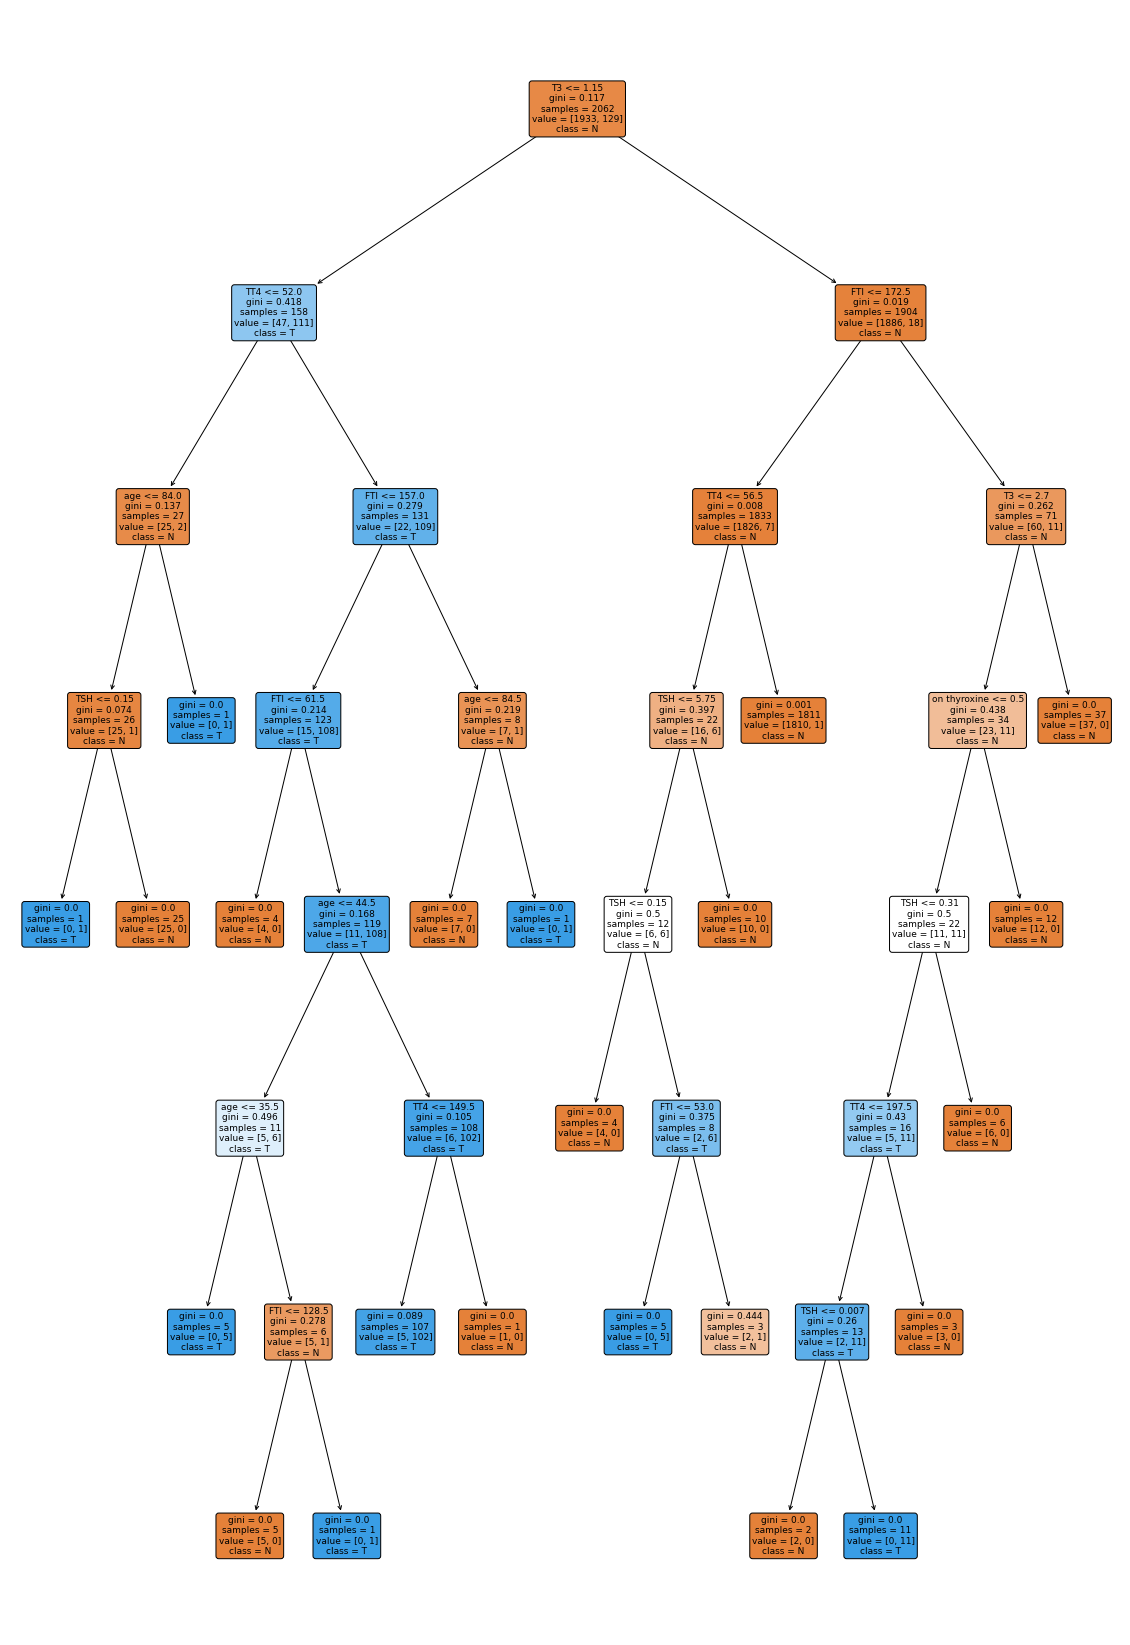

In [552]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(20,30))
_ = plot_tree(model_pruned,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)

In [553]:
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)

X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model_pruned.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))

Akurasi Score Data Test:  0.9845679012345679
Confusion Matrix: 
 [[906   6]
 [  9  51]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       912
           1       0.89      0.85      0.87        60

    accuracy                           0.98       972
   macro avg       0.94      0.92      0.93       972
weighted avg       0.98      0.98      0.98       972

Accuracy Score : 0.9845679012345679
Precision Score : 0.8947368421052632
Recall Score : 0.85
F1 Score : 0.8717948717948718


### **6. GRID SEARCH - CROSSV**

In [383]:
'''from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model_pruned=DecisionTreeClassifier(ccp_alpha=0.000727, criterion='gini',splitter='best')

# TODO: Create the parameters list you wish to tune.
parameters = {'criterion': ['gini'],'max_depth':[4,5,6,7,8], 
              'max_features': [1,2,3,4,5,6,7,8],
              'splitter': ['best']}

# TODO: Make an fbeta_score scoring object.
from sklearn.metrics import make_scorer 
from sklearn.metrics import f1_score 
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_pruned, parameters, scoring=scorer, cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X, y)

# TODO: Get the estimator.
model_pruned = grid_fit.best_estimator_

# Fit the new model.
model_pruned.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = model_pruned.predict(X_train)
best_test_predictions = model_pruned.predict(X_test1)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test1))

# Plot the new model.


# Let's also explore what parameters ended up being used in the new model.
model_pruned'''

"from sklearn.metrics import make_scorer\nfrom sklearn.model_selection import GridSearchCV\n\nmodel_pruned=DecisionTreeClassifier(ccp_alpha=0.000727, criterion='gini',splitter='best')\n\n# TODO: Create the parameters list you wish to tune.\nparameters = {'criterion': ['gini'],'max_depth':[4,5,6,7,8], \n              'max_features': [1,2,3,4,5,6,7,8],\n              'splitter': ['best']}\n\n# TODO: Make an fbeta_score scoring object.\nfrom sklearn.metrics import make_scorer \nfrom sklearn.metrics import f1_score \nscorer = make_scorer(f1_score)\n\n# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.\ngrid_obj = GridSearchCV(model_pruned, parameters, scoring=scorer, cv=10)\n\n# TODO: Fit the grid search object to the training data and find the optimal parameters.\ngrid_fit = grid_obj.fit(X, y)\n\n# TODO: Get the estimator.\nmodel_pruned = grid_fit.best_estimator_\n\n# Fit the new model.\nmodel_pruned.fit(X_train, y_train)\n\n# Make predictions using the new

In [384]:
'''#model_pruned=DecisionTreeClassifier(ccp_alpha=0.0, criterion='gini',splitter='best')

model=DecisionTreeClassifier(ccp_alpha=0.000647,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=8,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best')

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)

'''


'#model_pruned=DecisionTreeClassifier(ccp_alpha=0.0, criterion=\'gini\',splitter=\'best\')\n\nmodel=DecisionTreeClassifier(ccp_alpha=0.000647,\n                                              class_weight=None,\n                                              criterion=\'gini\', max_depth=7,\n                                              max_features=8,\n                                              max_leaf_nodes=None,\n                                              min_impurity_decrease=0.0,\n                                              min_impurity_split=None,\n                                              min_samples_leaf=1,\n                                              min_samples_split=2,\n                                              min_weight_fraction_leaf=0.0,\n                                              presort=\'deprecated\',\n                                              random_state=None,\n                                              splitter=\'best\')\n\nmodel_pruned.fit

In [385]:
'''from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(20,30))
_ = plot_tree(model_pruned,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)'''

"from sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix\nfrom sklearn.tree import DecisionTreeClassifier,plot_tree\nfrom sklearn.model_selection import cross_val_score,GridSearchCV\n\nplt.figure(figsize=(20,30))\n_ = plot_tree(model_pruned,filled=True,rounded=True,class_names=['N','T'],feature_names=data.columns)"

In [386]:
'''from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)

X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model_pruned.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))'''

'from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score\ndatates=pd.read_csv(\'https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data\')\n\ndatates.drop(\'no\', inplace=True, axis=1)\ndatates.drop(\'hypopituitary\', inplace=True, axis=1)\n\nX_test1=datates.iloc[:,0:20].values\n#Label Set\ny_test1=datates.iloc[:,20].values\n\ny_tested1 = model_pruned.predict(X_test1)\naccuracy_score_tested1 = accuracy_score(y_test1, y_tested1)\nprint("Akurasi Score Data Test: ", accuracy_score_tested1)\n\nconf_mat = confusion_matrix(y_test1, y_tested1)\nprint("Confusion Matrix: \n", conf_mat)\n\nfrom sklearn.metrics import classification_report\nprint (classification_report(y_test1, y_tested1))\n\nprint (\'Accuracy Score : \' + str(accuracy_score(y_test1,y_tested1)))\nprint (\'Precision Score : \' + str(precision_score(y_test1,y_tested1)))\nprint (\'Recall Score : \' + str(recall_score(y_test1,y_tested1)))\nprint(\'F1 Score : \' +